Mouhamadou Lamine Bara THIAW

# 1. Simple coin flip exercise

You have a coin that when flipped ends up head with probability $p$ and ends up tail with probability $1−p$. The value of $p$ is unknown.

Flipping the coin $\bf{n}$ times you end up with $\bf{k}$ heads. The objective of this exercise is to estimate the probability distribution of $p$ using this data.

Credits: 
- Panos Ipeirotis, https://www.behind-the-enemy-lines.com/2008/01/are-you-bayesian-or-frequentist-or.html

## Import librairies

In [35]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import scipy.special as sc
from scipy.stats import beta     # beta probability distribution function

## Parameters of the exercise

In [36]:
k,n = 100,140 # number of heads and trials

> 1. What could be a coarse estimation of $p$?

A coarse approximation of p can be $\hat{p} =  \frac{k}{n}$

## Bayesian treatment: mathematical approach

We will see that, for this particular exercice, it is actually straightforward to access p. Here, p is not a value, it's a distribution and to compute it we start from the Bayes rule:

$$
P(p|data) = \frac{P(data | p) P(p)}{P(data)},
$$

where $P(data | p)$ is given by the Binomial distribution which determines the probability of observing k "heads" in  n flip when the probability of success (head result) is given by p:

$$
P(data|p) = P(k|p,n) = \binom nk p^k (1-p)^{n-k}, \,\,\, \text{with the binomial coefficient: } \binom nk = \frac{n!}{k! (n-k)!}.
$$


Now, for the prior distribution $P(p)$, a very convenient choice for this scenario (also known as the conjugate prior of the binomial) is the <a href="https://en.wikipedia.org/wiki/Beta_distribution#Shapes">Beta distribution</a>, $Beta(p|a,b)$ defined as:

$$
Beta(p|a,b) =  \frac{1}{B(a,b)} p^{a-1}(1-p)^{b-1}
$$

where $B$ is the <a href="https://en.wikipedia.org/wiki/Beta_function">beta function</a> (not to be mistaken with the beta distribution !) and is a normalization constant to ensure that the probability integrates to 1. A distribution $Beta(p|a,b)$ has a mean of $\frac{a}{a+b}$.

---

> 2. With some simple calculations, show that the posterior is of the same distribution family as the prior (Beta distribution) and that the posterior distribution comes down to:

$$
P(p|data) = Beta(p|k+a, n - k + b) 
$$

***Thus the posterior of this problem depends of the data (k and n) and the two parameters (a and b) that defines the prior !***

----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

Solution \
By using Bayes theorem we have: 

$$ P(p | data)= \frac{P(data | p)P(p)}{P(data)}
$$

By replacing by the values of elements in the numerator, we can get a proportionnal  of $P(p | data)$ and then:
$$ P(p|data) \propto \frac{1}{B(a, b)} \binom{n}{k} p^{a+k-1} (1-p)^{b+n-k-1}



\propto \frac{1}{B(a, b)} p^{a+k-1}(1-p)^{b+n-k-1}
$$
We know that the distribution of the beta law is given by : $$ {B(\alpha, \beta)} :  x ->  \frac{1}{B(\alpha, \beta)} x^{\alpha - 1} (1 - x)^{\beta - 1}  $$

We can now identify the coefficients by doing::
$$

\begin{align*}
    a + k &= \alpha \\
    b + n - k &= \beta
\end{align*}
$$
And then we can conclude that the posterior distribution come down to :
$$
P(p|data) = Beta(p|k+a, n - k + b) 
$$

----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------




## 1.1. Prior and posterior distributions

The Beta distribution, for parameters $a$ and $b$, is given by the function ```beta.pdf(x,a,b)``` 

> 3. Plot the shape of the prior for different values of a and b.


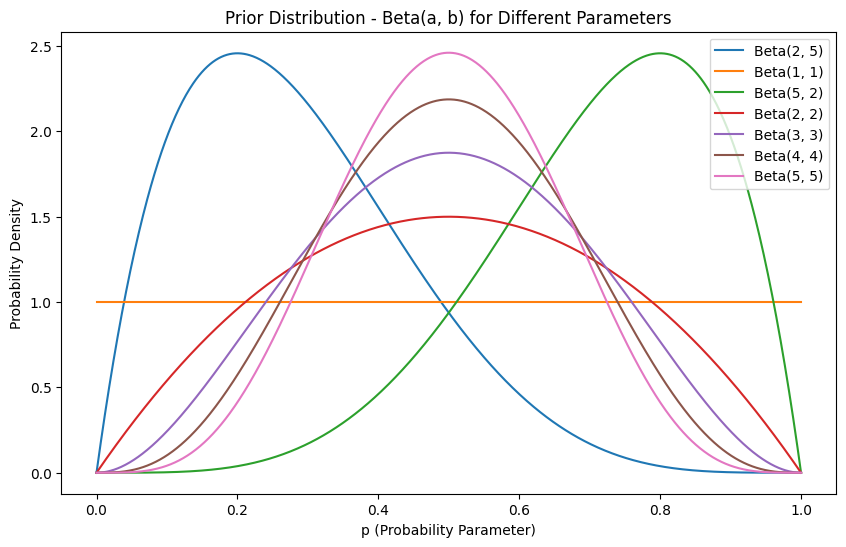

In [37]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

interval = np.linspace(0,1,1000)
parameters = [(2, 5), (1, 1), (5, 2),(2,2),(3,3),(4,4),(5,5)]
plt.figure(figsize=(10,6))

for a,b in parameters:
    y=beta.pdf(interval,a,b)
    plt.plot(interval,y,label=f'Beta({a}, {b})')

plt.title('Prior Distribution - Beta(a, b) for Different Parameters')
plt.xlabel('p (Probability Parameter)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

> 4. Why could it be a good choice to choose a symmetric ($a=b$) prior?

We know that a symmetric prior correspond to a normal distribution on $[0,1]$.

It does not favor any particular value of p over another. It expresses a lack of prior knowledge or bias, leaving data to play a more dominant role in subsequent influence.

### 1.1.a) Model 1: uniform prior

> 5. For Model 1, choose an uniform prior ($a_1=b_1=1$) and plot the corresponding posterior distribution. 

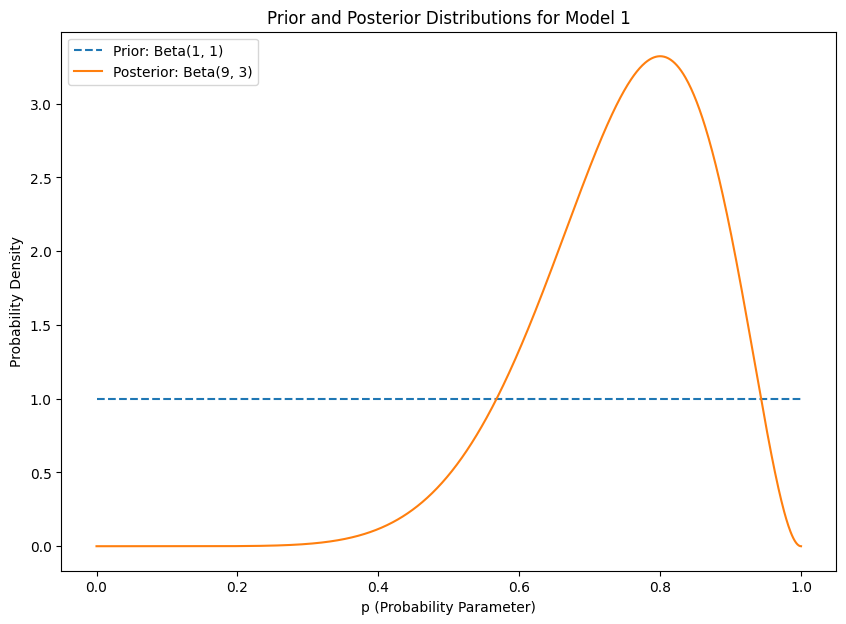

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta


k = 8  # number of head in n flips
n = 10  #number of flips


a1 = 1
b1 = 1

# Parameters given by our last identification
a1_posterior = a1 + k
b1_posterior = b1 + n - k


x = np.linspace(0, 1, 1000)

prior = beta.pdf(x, a1, b1)
posterior = beta.pdf(x, a1_posterior, b1_posterior)

plt.figure(figsize=(10, 7))
plt.plot(x, prior, label='Prior: Beta(1, 1)', linestyle='--')
plt.plot(x, posterior, label=f'Posterior: Beta({a1_posterior}, {b1_posterior})')

plt.title('Prior and Posterior Distributions for Model 1')
plt.xlabel('p (Probability Parameter)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


> 6. Derive the MAP estimator and MMSE estimator (i.e. averaged $p$) for model 1. Is it consistent with your coarse estimation of $p$? How do they behave with the amount of data ($k$ and $n$)?

Let's derive the MAP of the estimator for model 1.
The MAP of the estimator is given by the mode of the posterior.
Here we know that the posterior is distributed following $  Beta(a1 + k, b1 + n - k )    $.
Given that we know that the mode of $ Beta(a,b)$ is $\frac{a - 1}{a + b -2}$

Then the  MAP_ estimator is: $$ MAP estimator  =  \frac{a1 + k - 1}{a1 + b1 + n - 2} = \frac{k}{n}  $$

The MMSE is the mean of the posterior :
$$ MMSE = \frac{a1 + k}{a1 + b1 + n} = \frac{1 + k}{2 + n } $$

### 1.1.b) Model 2: peaked prior

> 7. Now, for Model 2, plot the posterior distribution for a 'peaked' prior (e.g. $a_2=b_2=10$) and comment in comparison to Model 1.

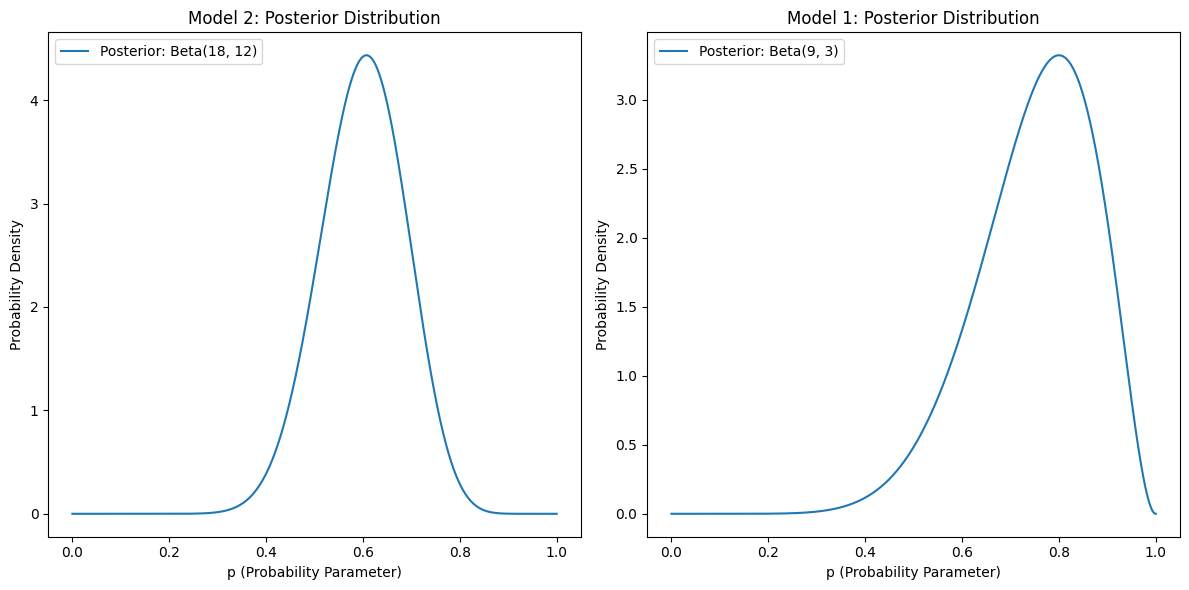

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

k = 8  
n = 10  

a2 = b2 = 10

a2_posterior = a2 + k
b2_posterior = b2 + n - k

x = np.linspace(0, 1, 1000)

prior_model2 = beta.pdf(x, a2, b2)
posterior_model2 = beta.pdf(x, a2_posterior, b2_posterior)

plt.figure(figsize=(12, 6))





plt.subplot(1, 2, 1)
plt.plot(x, posterior_model2, label=f'Posterior: Beta({a2_posterior}, {b2_posterior})')
plt.title('Model 2: Posterior Distribution')
plt.xlabel('p (Probability Parameter)')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, posterior, label=f'Posterior: Beta({a1_posterior}, {b1_posterior})')
plt.title('Model 1: Posterior Distribution')
plt.xlabel('p (Probability Parameter)')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()


> 8. Derive the MAP estimator and MMSE estimator (i.e. averaged $p$) for Model 2. Comment in comparison to Model 1.

Then the  MAP_ estimator is: $$ MAP estimator  =  \frac{a2 + k - 1}{a2 + b2 + n - 2} = \frac{9 + k}{18 + n}  $$


$$ MMSE = \frac{a2 + k}{a2 + b2 + n} = \frac{10 + k}{20 + n } $$


### 1.1.c) Model 3: Very peaked prior

> 9. For Model 3, plot the posterior distribution for a 'peaked' prior (e.g. $a_3=b_3=100$) and comment in comparison to Models 1 and 2.

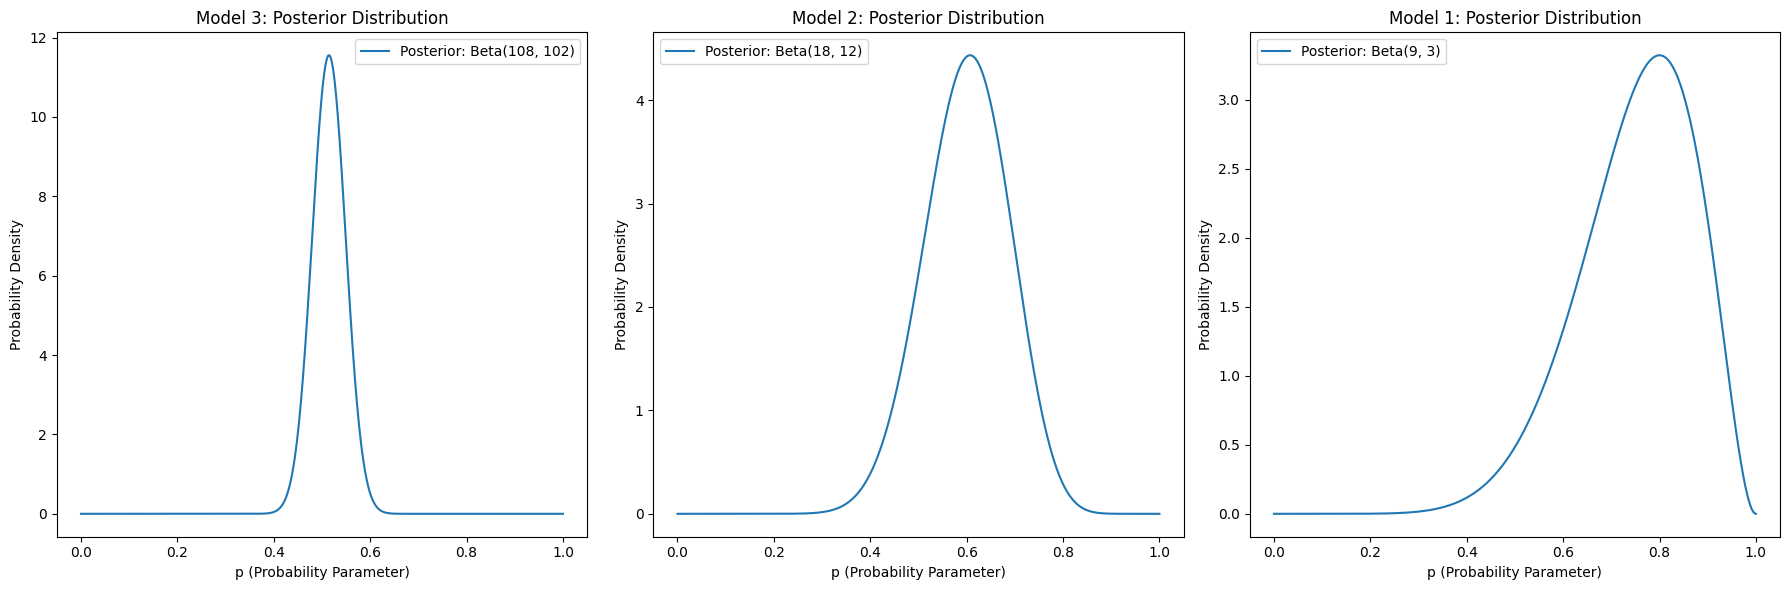

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

k = 8  
n = 10  


a3 = b3 = 100

a3_posterior = a3 + k
b3_posterior = b3 + n - k

# Generate values for p (probability parameter)
x = np.linspace(0, 1, 1000)

# Calculate prior and posterior distributions for Model 3
prior_model3 = beta.pdf(x, a3, b3)
posterior_model3 = beta.pdf(x, a3_posterior, b3_posterior)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(x, posterior_model3, label=f'Posterior: Beta({a3_posterior}, {b3_posterior})')
plt.title('Model 3: Posterior Distribution')
plt.xlabel('p (Probability Parameter)')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x, posterior_model2, label=f'Posterior: Beta({a2_posterior}, {b2_posterior})')
plt.title('Model 2: Posterior Distribution')
plt.xlabel('p (Probability Parameter)')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(x, posterior, label=f'Posterior: Beta({a1_posterior}, {b1_posterior})')
plt.title('Model 1: Posterior Distribution')
plt.xlabel('p (Probability Parameter)')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()


posterior of model 3 has less variance than 1 and 2

> 10. Derive the MAP estimator and MMSE estimator (i.e. averaged $p$) for model 1. Comment in comparison to Models 1 and 2.

Let's derive the MAP and MMSE estimator 
 $$ MAP estimator  =  \frac{a3 + k - 1}{a3 + b3 + n - 2} = \frac{99 + k}{198 + n}  $$


$$ MMSE = \frac{a3 + k}{a3 + b3 + n} = \frac{100 + k}{200 + n } $$


## 1.2. Bayes factor

For comparing the plausibility of two models, we can resort to <a href="https://en.wikipedia.org/wiki/Bayes_factor">Bayes factors</a>.

The Bayes factor is the ratio of the marginal likelihoods of the two models, that is, the likelihoods of two statistical models integrated over the prior probabilities of their parameters. Here instead of comparing models, we can now also compare hypotheses encoded in the form of priors.

The marginal likelihood is given by:
$$
P(data) = \int P(data | p)P(p)dp
$$

The Bayes factor K for comparing the plausibility of two models is:
$$
K = \frac{P(data | \text{Model}_1)}{P(data | \text{Model}_2)} = \frac{\int P(data | p,  \text{Model}_1)P(p |  \text{Model}_1)dp}{\int P(data | p,  \text{Model}_2)P(p |  \text{Model}_2)dp}.
$$

A value of K > 1 means that Model1 is more strongly supported by the data under consideration than Model2. The relative strength of a Bayes factor can be determined by consulting the <a href="https://en.wikipedia.org/wiki/Bayes_factor#Interpretation">interpretation tables</a>.


For the binomial model (with a conjugate Beta prior) the Bayes factor is easily calculated:

$$
K = \frac{P(data | \text{Model}_1)}{P(data | \text{Model}_2)}  = \frac{B(k+a_1,n-k+b_1)}{B(a_1,b_1)} \times \frac{B(a_2,b_2)}{B(k+a_2,n-k+b_2)}.
$$

Here $B$ is the beta function.

> 11. Calculate the Bayes factors corresponding to the comparison of the three models used above (uniform prior, 'peaked' prior and 'very peakd' prior). Hint: to ease numerical calculation it is better to consider the logarithm of the beta function ```sc.betaln``` (instead of the beta function ```sc.beta``` that can have very low values). Conclude on which model to choose.

In [41]:
from scipy.special import betaln


k = 8
n = 10

a1 = b1 = 1
a2 = b2 = 10
a3 = b3 = 100
a1_posterior=a1 + k
b1_posterior = b1 +n-k
a2_posterior = a2+k
b2_posterior = b2 +n - k
a3_posterior = a3+k
b3_posterior = b3 + n -k

# Here I calculate the correspondings logs

log_bf_1_vs_2 = betaln(a1_posterior, b1_posterior) -betaln(a1, b1) +betaln(a2, b2) - betaln(a2_posterior, b2_posterior)
log_bf_1_vs_3 = betaln(a1_posterior, b1_posterior) -betaln(a1, b1) +betaln(a3, b3) - betaln(a3_posterior, b3_posterior)
log_bf_2_vs_3 = betaln(a2_posterior, b2_posterior) -betaln(a2, b2) +betaln(a3, b3) - betaln(a3_posterior, b3_posterior)

bf_1_vs_2 = np.exp(log_bf_1_vs_2)
bf_1_vs_3 = np.exp(log_bf_1_vs_3)
bf_2_vs_3 = np.exp(log_bf_2_vs_3)
print("Bayes Factor (Model 1 vs. Model 2):", bf_1_vs_2)
print("Bayes Factor (Model 1 vs. Model 3):", bf_1_vs_3)
print("Bayes Factor (Model 2 vs. Model 3):", bf_2_vs_3)


Bayes Factor (Model 1 vs. Model 2): 1.3618862421001479
Bayes Factor (Model 1 vs. Model 3): 1.9449437768323226
Bayes Factor (Model 2 vs. Model 3): 1.4281249906989806


Here we have to choose Model 1

## 1.3. Making predictions

In Bayesian inference we can use our probabilistic statements about the parameter from the posterior for making predictions. This is usually refered to as <a href="https://en.wikipedia.org/wiki/Posterior_predictive_distribution">posterior predictive distribution</a>. 


This is the distribution of unobserved data, conditioned on observed data and prior. It follows the idea as the marginal likelihood discussed above (which can be seen as a prior predictive distribution), namely that we want to evaluate new data on our fitted model. 

We can write the posterior predictive distribution for some new unseen data $x$, as the marginal of a distribution conditioned on observed data and prior:

$$
P(x |data) = \int P(x|p)P(p |data)dp
$$

where $data$ refers to our training data, and $x$ to some new unseen data.

> 12. For the beta-binomial model, compute $P(j | m,k,n,a,b)$ where $j$ refers to the new number of Heads, $m$ to the new number of total flips, $k$ to the previous number of Heads, $n$ to the previous number of total flips, and $a$ and $b$ to our prior hyperparameters.


In [42]:
import scipy.special as sps

def posterior_predictive_probability(j, m, k, n, a, b):
    # Calculate the binomial coefficient
    binomial_coefficient = sps.comb(m, j)
    
    # Calculate the beta function values
    beta_num = sps.beta(k + j + a, n - k + m - j + b)
    beta_denom = sps.beta(a + k, b + n - k)
    
    # Calculate the posterior predictive probability
    predictive_prob = binomial_coefficient * (beta_num / beta_denom)
    
    return predictive_prob


j = 5  #new number of heads
m = 10  #new number of total flips
k = 8  #last number of heads
n = 10  #last number of total flips
a = 1  #prior hyperparameter
b = 1  #prior hyperparameter

posterior_predictive_prob = posterior_predictive_probability(j, m, k, n, a, b)
print("The computed value is")
print(f'P({j} | {m}, {k}, {n}, {a}, {b}) = {posterior_predictive_prob}')


The computed value is
P(5 | 10, 8, 10, 1, 1) = 0.07662538699690404


$$
P(j | m,k,n,a,b) = \int 
P(j|m,p)P(p |k,n,a,b)dp= \binom{m}{j} \frac{B(k+j+a,n-k+m-j+b)} {B(a+k,b+n-k)}
$$


> 13. Calculate the probability of flipping 2 heads out of 2 new flips with the model you selected as the best in the previous question
>
> 14. Calculate the probability of flipping 3 heads out of 5 new flips with the model you selected as the best in the previous question

In [43]:
j1 = 2  
m1 = 2 
k1 = 8  
n1 = 10  
a1 = 1  
b1 = 1 

a1_posterior = a1 + k1
b1_posterior = b1 + n1 - k1

# Calculate the posterior predictive probability
posterior_predictive_prob_2_heads = posterior_predictive_probability(j1, m1, k1, n1, a1_posterior, b1_posterior)
print(f'P({j1} heads in {m1} flips) = {posterior_predictive_prob_2_heads}')


P(2 heads in 2 flips) = 0.6047430830039525


In [44]:
j2 = 3 
m2 = 5  

# Calculate the posterior predictive probability
posterior_predictive_prob_3_heads = posterior_predictive_probability(j2, m2, k1, n1, a1_posterior, b1_posterior)
print(f'P({j2} heads in {m2} flips) = {posterior_predictive_prob_3_heads}')


P(3 heads in 5 flips) = 0.2209638187899057


> 15. What can you conclude about the quality of these predictions? How will the prediction probability behave with increasing number of new flips? Check by producing the plot of the prediction probability of any $j$ with values of m between $1$ and $200$ for instance.

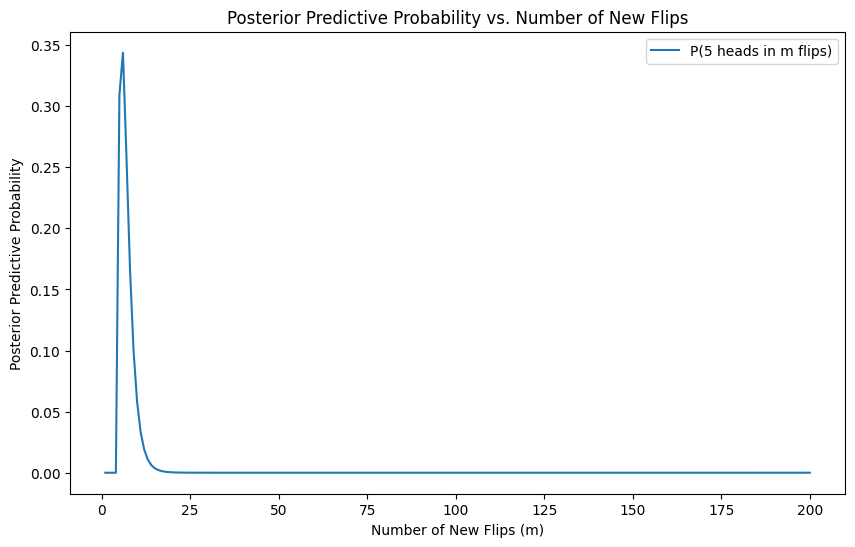

In [45]:
import matplotlib.pyplot as plt

j = 5  
k = 8 
n = 10  
a = 1  
b = 1   

a_posterior = a + k
b_posterior = b + n - k

m_values = np.arange(1, 201)

posterior_predictive_probs = [posterior_predictive_probability(j, m, k, n, a_posterior, b_posterior) for m in m_values]

plt.figure(figsize=(10, 6))
plt.plot(m_values, posterior_predictive_probs, label=f'P({j} heads in m flips)')
plt.title('Posterior Predictive Probability vs. Number of New Flips')
plt.xlabel('Number of New Flips (m)')
plt.ylabel('Posterior Predictive Probability')
plt.legend()
plt.show()


The prediction probability will decrease

# 2. The lighthouse problem

The following is a classic estimation problem called the "lighthouse problem". The figure shows a set of receivers distributed at coordinates $x_k$ along the shore and a lighthouse located at some position $(\alpha,\beta)$ offshore. The idea is that the coastline is equipped with a continuous strip of photodetectors. The lighthouse flashes the shore $N$ times at some random angle $\theta_k$. The strip of  photodetectors registers the $k^{th}$ flash position $x_k$, but the angle $\theta_k$ of the flash is unknown. Furthermore, the lighthouse beam is laser-like so there is no smearing along the strip of photodetectors. In other words, the lighthouse is actually more of a disco-ball in a dark nightclub.

The problem is how to estimate $\alpha$ given we already have $\beta$.

Credits:
- Data Analysis: Bayesian tutorial. D.S.Sivia.

<img src="Lighthouse_schematic.jpg" width="600">

Given the nature of the lighthouse emission it seems reasonable to assign an uniform density function to the angle $\theta_k$, such that it is uniformly distributed between $\pm \pi/2$:
$$ P(\theta_k|\alpha, \beta) = \frac{1}{\pi} $$

Now, what we really want is the density function for $x_k$ which will tell us the probability that the $k^{th}$ flash will be recorded at position $ x_k $. From basic trigonometry, we have the following:

$$ \beta \tan(\theta_k) = x_k - \alpha $$

Thus, after a transformation of variables, we obtain the following:

$$ P(x_k|\alpha, \beta) = \frac{\beta}{\pi \left[\beta ^2 +(x_k-\alpha)^2 \right]}. $$

This distribution is known as the [Cauchy distribution](https://en.wikipedia.org/wiki/Cauchy_distribution).




## 2.1. Data generation

First we'll generate some toy data that will be used in this exercise. We assume that the 'true' values of the parameters that we want to infer are $\alpha = \beta = 1$.

> 16. Run the cell below to generate N=250 values of the angle $\theta_k$ uniformely distributed between $-\pi/2$ and $+\pi/2$ and to calculate the corresponding $x_k$ values.
>
> 17. Make a histogram of the $\theta_k$ and $x_k$ values
>
> 18. Define the function $P(x_k|\alpha, \beta)$ and draw it for fixed $\alpha = \beta = 1$ values.

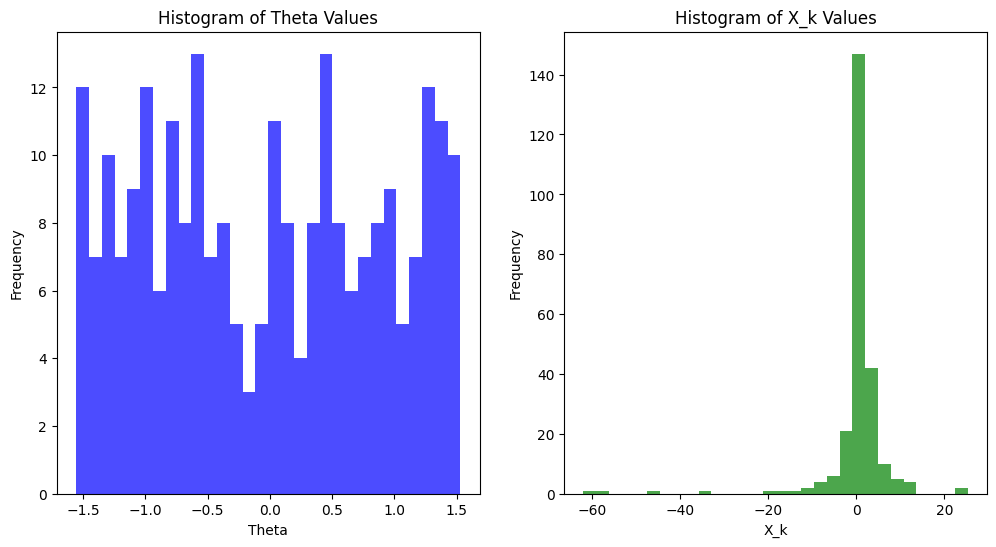

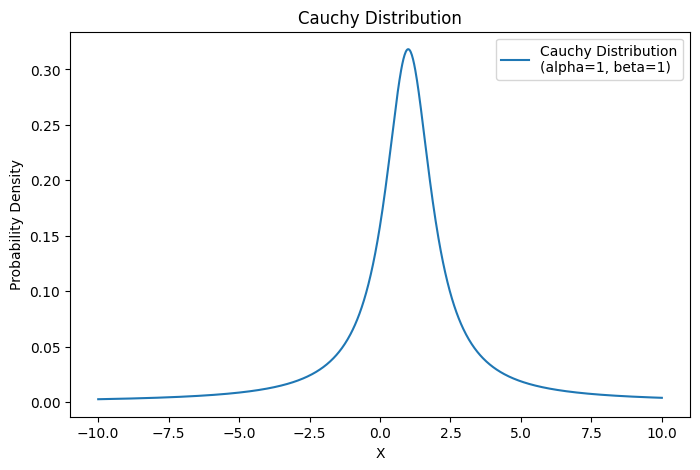

In [46]:

np.random.seed(42)

def generate_data(N, alpha, beta):
    theta_values = np.random.uniform(-np.pi/2, np.pi/2, N)
    x_values = beta*np.tan(theta_values) + alpha
    return theta_values, x_values

N = 250
alpha =1
beta = 1
theta_values, x_values = generate_data(N, alpha, beta)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(theta_values, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Theta Values')
plt.xlabel('Theta')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(x_values, bins=30, color='green', alpha=0.7)
plt.title('Histogram of X_k Values')
plt.xlabel('X_k')
plt.ylabel('Frequency')

plt.show()

def cauchy_distribution(x, alpha, beta):
    return beta / (np.pi * (beta**2 + (x - alpha)**2))

alpha_distrib = beta_distrib = 1
x_range = np.linspace(-10, 10, 1000)
pdf_values = cauchy_distribution(x_range, alpha_distrib, beta_distrib)

plt.figure(figsize=(8, 5))
plt.plot(x_range, pdf_values, label=f'Cauchy Distribution\n(alpha={alpha_distrib}, beta={beta_distrib})')
plt.title('Cauchy Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


## 2.2. Bayesian inference

Given a set of observed measurements $\{x_k\}$ we can infer the position along the shore of the lighthouse, $\alpha$, by the posterior pdf $P(\alpha|\{x_k\},\beta)$. Here, to simplify the problem, we assume that the distance to the coast, $\beta$, is known. Writing down the Bayes theorem we have:

$$
P(\alpha|\{x_k\},\beta) \propto P(\{x_k\}|\alpha,\beta) P(\alpha|\beta).
$$

As the knowledge of $\beta$, without the data, tells us nothing new about the position $\alpha$, let us assign a single uniform pdf to the prior:

$$
P(\alpha|\beta) = P(\alpha) \begin{cases}
 A & \alpha_\text{min} \leq \alpha \leq \alpha_\text{max} \\
 0 & \text{otherwise}
\end{cases}
$$

where $A$ is a constant and $\alpha_\text{min}$ and $\alpha_\text{max}$ represent the limit of the coastline.

$P(\{x_k\}|\alpha,\beta)$ is the likelihood of the data that is just the product of the probabilities for obtaining the N individual observations $x_k$:

$$
P(\{x_k\}|\alpha,\beta) = \prod_{k=1}^N P(x_k|\alpha,\beta).
$$

From the equations above one can write the logarithm of the posterior distribution as:

$$\mathcal{L}(\alpha)= \log P(\alpha|\{x_k\},\beta) = \text{constant}- \sum_{k=1}^N \ln \left[ \beta^2 + (x_k-\alpha)^2 \right]
$$

The MAP estimate of the position $\alpha$ is given by the maximum of the posterior pdf. Taking the first derivative gives us the equation we would have to solve:

$$
\frac{d \mathcal{L}}{d \alpha} = 2 \sum_{k=1}^N \frac{x_k-\alpha}{\beta^2+(x_k-\alpha)^2}=0.
$$

Unfortunately, there is no easy way to solve for the optimal $\alpha$ for this equation. However, nothing can prevent us from addressing this problem numerically.

For this we will use brute force to evaluate $\mathcal{L}(\alpha)$ for a range of possible values $\alpha$:

> 19. Implement the function $\mathcal{L}(\alpha)$. We can ignore the constant in this expression as we will deal with it below,
>
> 20. Calculate $\mathcal{L}(\alpha)$ with the available data and for a grid of values in the range $3 \leq \alpha \leq 3$. Then subtract the maximum value of $\mathcal{L}(\alpha)$ to $\mathcal{L}(\alpha)$
>
> 21. Finally plot the posterior distribution $P(\alpha|\{x_k\},\beta) = \exp(\mathcal{L}(\alpha))$ as a function of $\alpha$.
>
> 22. Print out the maximum posterior estimate

maximum posterior estimate = 0.939


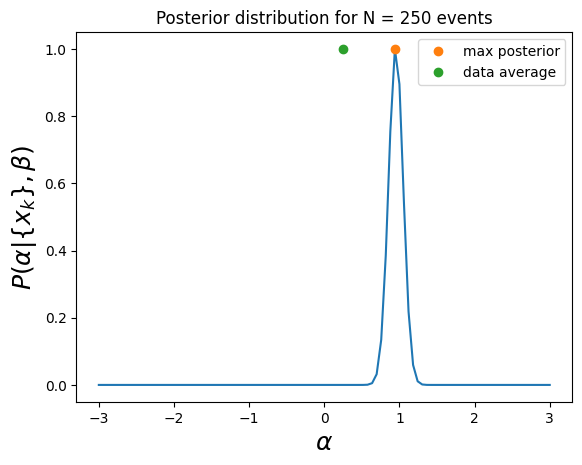

In [47]:
# 19)
def logposterior(alpha,x_samples,beta):
    return -1 * np.sum(np.log(np.power(x_samples-alpha,2)+beta**2))

# 20)
aa = np.linspace(-3,3,100)
x_samples=x_values
llog = []
for a in aa:
    llog += [logposterior(a,x_samples,beta)]

llog = np.array(llog)
llog -= np.max(llog) # Subtract max value

# 21)
posterior = np.exp(llog)
plt.plot(aa,posterior)
plt.xlabel(r'$\alpha$',fontsize=18)
plt.ylabel(r'$P(\alpha|\{x_k\},\beta)$',fontsize=18)
plt.title('Posterior distribution for N = %d events' % N)

# 22)
ymax = np.max(posterior)
xpos = np.where(posterior == ymax)
alpha_max = aa[xpos]
plt.plot(alpha_max,ymax,'o',label='max posterior')
plt.plot(x_samples.mean(),ymax,'o',label='data average')
plt.legend()

print('maximum posterior estimate = %.3f' % alpha_max[0])

## 2.3. Comparing maximum posterior estimate and plain averaging

The best estimator for a mean $\mu$ of a normal distribution is simply given by the sample average. As in the limit of large numbers all distributions should behave as a normal distribution (this is the Central Limit Theorem) why didn't we just take the average of the $\lbrace x_k \rbrace$ and use that to estimate $\alpha$?

We will see here that in the present case, this is a bad idea!

> 23. Run the full procedure above 10 times. At each trial generate a new sample, then compare the maximum posterior estimate with the sample average. Do these result seem to agree ?
>
> 24. Now let's explore this problem by performing a large number of trials (say 100), Make a plot showing, as a function of the trial number, the posterior maximum estimate and the sample average with its standard deviation. What is your conclusion ? 


Trial 1
maximum posterior estimate = 1.121
alpha using average = 1.169 +- 0.434
Trial 2
maximum posterior estimate = 0.879
alpha using average = 6.049 +- 4.524
Trial 3
maximum posterior estimate = 0.939
alpha using average = 0.544 +- 0.575
Trial 4
maximum posterior estimate = 1.182
alpha using average = 2.656 +- 0.883
Trial 5
maximum posterior estimate = 1.061
alpha using average = 3.020 +- 2.244
Trial 6
maximum posterior estimate = 0.939
alpha using average = 1.913 +- 0.655
Trial 7
maximum posterior estimate = 1.121
alpha using average = 1.338 +- 1.020
Trial 8
maximum posterior estimate = 1.061
alpha using average = 1.340 +- 0.407
Trial 9
maximum posterior estimate = 0.939
alpha using average = 0.095 +- 0.950
Trial 10
maximum posterior estimate = 1.061
alpha using average = -9.813 +- 9.510


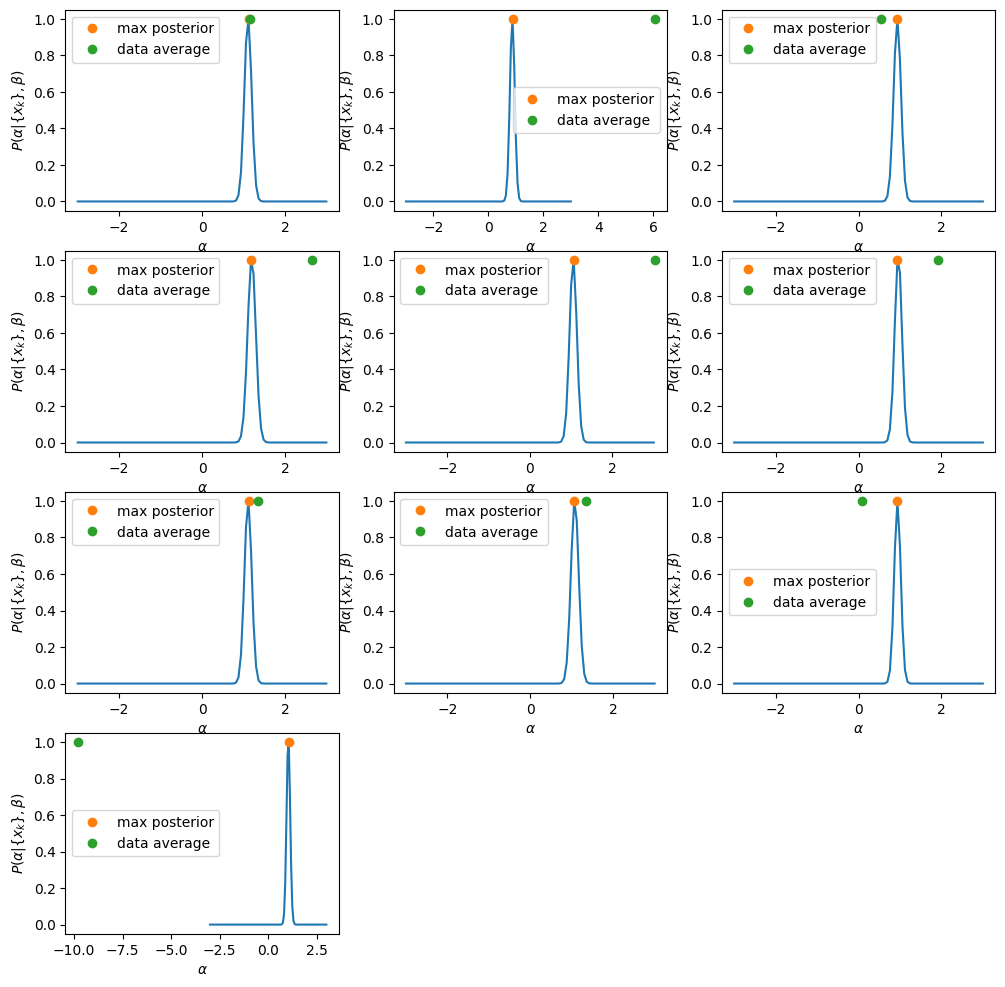

In [49]:
# 23)

Ntrial = 10

def runtrial(do_plot=True):

    # generate new data
    theta_samples, x_samples = generate_data(N,alpha,beta)
    
    # Calculate posterior
    aa = np.linspace(-3,3,100)
    llog = []
    for a in aa:
        llog += [logposterior(a,x_samples,beta)]
        
    llog = np.array(llog)
    llog -= np.max(llog) # Subtract max value
    
    posterior = np.exp(llog)

    ymax = np.max(posterior)
    xpos = np.where(posterior == ymax)
    alpha_max = aa[xpos]

    sample_mean = x_samples.mean() # mean
    sample_mean_error = x_samples.std() / np.sqrt(N)
    
    if do_plot:
        plt.plot(aa,posterior)
        plt.xlabel(r'$\alpha$')
        plt.ylabel(r'$P(\alpha|\{x_k\},\beta)$')
        #plt.title('Posterior distribution for N = %d events' % N)

        plt.plot(alpha_max,ymax,'o',label='max posterior')
        plt.plot(x_samples.mean(),ymax,'o',label='data average')
        plt.legend()
   
    return alpha_max[0], sample_mean, sample_mean_error, np.median(x_samples)

plt.figure(figsize=(12,12))
for i in range(Ntrial):
    print('Trial %d' % (i+1))
    plt.subplot(4,3,i+1)
    alpha_max, sample_mean, sample_mean_error, sample_median = runtrial(True)
    print('maximum posterior estimate = %.3f' % alpha_max)
    print('alpha using average = %.3f +- %.3f' % (sample_mean,sample_mean_error))


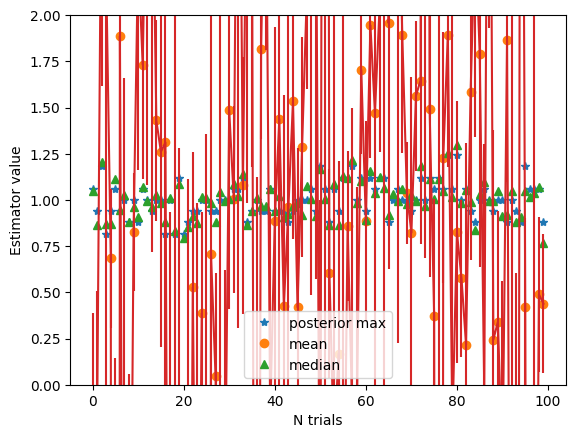

In [50]:
# 24)

Ntrial = 100

posterior_max = []
mean = []
mean_error = []
median = []

for i in range(Ntrial):
    alpha_max, sample_mean, sample_mean_error, sample_median = runtrial(False)
    posterior_max += [alpha_max]
    mean += [sample_mean]
    mean_error += [sample_mean_error]
    median += [sample_median]
    
plt.plot(range(Ntrial), posterior_max, '*',label='posterior max')
plt.plot(range(Ntrial), mean, 'o',label='mean')
plt.plot(range(Ntrial), median, '^',label='median')
plt.errorbar(range(Ntrial), mean, yerr=mean_error)
plt.ylim(0,2)
plt.xlabel('N trials')
plt.ylabel('Estimator value')
plt.legend()    

In [51]:
print('Mean of posterior max values: %.3f +- %.3f' %(np.array(posterior_max).mean(),np.array(posterior_max).std()))
print('Mean of median values: %.3f +- %.3f' %(np.array(median).mean(),np.array(median).std()))
print('Mean of average values: %.3f +- %.3f' %(np.array(mean).mean(),np.array(mean).std()))

Mean of posterior max values: 1.003 +- 0.092
Mean of median values: 1.001 +- 0.099
Mean of average values: -1.084 +- 12.512


Conclusion: you should observe that the estimate using the average has enormous variance. This is a consequence of the fact that the Cauchy distribution is very peculiar as it has no defined mean or variance! Therefore the Central Limit Theorem is not applicable to the Cauchy distribution.

The morale of this exercise is that the sample mean is not alway a good number to use, and in this particular case it is best to use more refined knowledge of the posterior pdf to determine what is best. Such knowledge can be gained by outputting samples from such distributions by Monte Carlo methods.

> 25. What other estimate than the averaged sample value could be used to estimate $\alpha$? Add this new estimator to your answer to the previous questions 23 and 24 